In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd/content/drive/My Drive/Python Collabs/Supervised Learning Regression Checkpoint

/content/drive/My Drive/Python Collabs/Supervised Learning Regression Checkpoint


**Importing Libraries**

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from scipy import stats as st
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv("kc_house_data.csv",sep=',')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.columns #Visualisation of features

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Analyzing Bedrooms feature**

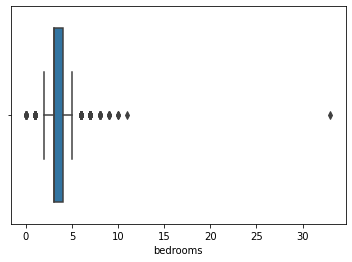

In [9]:
sns.boxplot(x=df['bedrooms'])

outliers are clear here , specially the value superior to 30

This function is to replace outlier with Nan values

In [10]:
ot=df.describe()
c='bedrooms'
max=10
min=1

def outlier_replacer_funct(df,c,max):
  for i in range(0,len(df[c])):
    if df[c][i]>max or df[c][i]<1 :
       df[c][i]=np.nan

In [11]:
df1=df.copy()
outlier_replacer_funct(df1,c,max)

<ipython-input-10-635f8f08bca7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][i]=np.nan
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
df1.describe()  # Checking after np.nan replacement

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21598.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.371145,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.903013,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,1.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


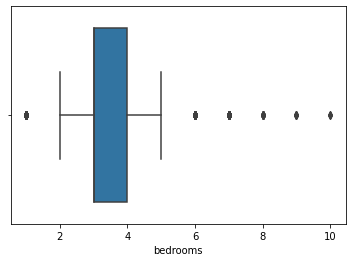

In [13]:
sns.boxplot(x=df1['bedrooms'])

much 'logic' outliers kept

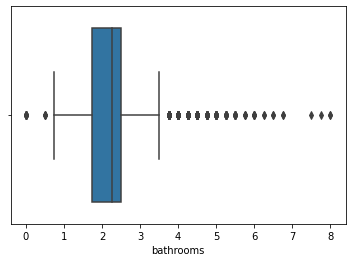

In [14]:
sns.boxplot(x=df['bathrooms'])

outliers i decide to cut the values over 8

In [15]:
ot2=df.describe()
c1='bathrooms'
max1=8
min1=1
print(max1,min1)

8 1


In [16]:
outlier_replacer_funct(df1,c1,max1)

<ipython-input-10-635f8f08bca7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][i]=np.nan


In [17]:
for i in range(0,len(df1['bedrooms'])):
     if not df1['bedrooms'][i]<1000000:
      df1['bedrooms'][i]=df['bedrooms'].median()

<ipython-input-17-cb960ab0c74d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bedrooms'][i]=df['bedrooms'].median()
<ipython-input-17-cb960ab0c74d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bedrooms'][i]=df['bedrooms'].median()
<ipython-input-17-cb960ab0c74d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bedrooms'][i]=df['bedrooms'].median()
<ipython-input-17-cb960ab0c74d>:3: SettingWithCopyWarning: 
A value

In [18]:
for i in range(0,len(df1['bathrooms'])):                #replacing by median because the distribution is not normal
     if not df1['bathrooms'][i]<1000000:
      df1['bathrooms'][i]=df['bathrooms'].median()

<ipython-input-18-4d35fbe71a26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bathrooms'][i]=df['bathrooms'].median()
<ipython-input-18-4d35fbe71a26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bathrooms'][i]=df['bathrooms'].median()
<ipython-input-18-4d35fbe71a26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bathrooms'][i]=df['bathrooms'].median()
<ipython-input-18-4d35fbe71a26>:3: SettingWithCopyWarning: 
A

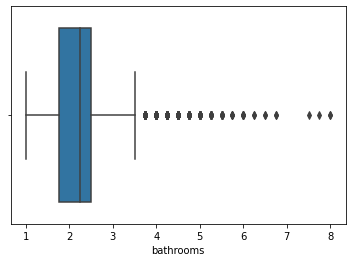

In [19]:
sns.boxplot(x=df1['bathrooms'])

In [20]:
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370888,2.121119,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.902753,0.764478,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,1.000000,1.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


the data here are cleaned from 'bedrooms' and 'bathrooms' outliers and prepared

In [21]:
df.loc[df['sqft_living'] > 12000.000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
12777,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


visualize the excessive values of sqft_living prior to their number bathrooms and bedrooms 

In [22]:
df1.drop([7252, 12777],axis=0,inplace=True)

In [23]:
df1.iloc[7252,:]

id                    5608010980
date             20141007T000000
price                   878000.0
bedrooms                     4.0
bathrooms                    2.5
sqft_living                 3480
sqft_lot                   13421
floors                       2.0
waterfront                     0
view                           0
condition                      3
grade                         11
sqft_above                  3480
sqft_basement                  0
yr_built                    1995
yr_renovated                   0
zipcode                    98027
lat                      47.5504
long                    -122.097
sqft_living15               3290
sqft_lot15                  9642
Name: 7253, dtype: object

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]), array([ 0,  0,  0, ..., 10, 11, 33])),
 (0.8567795371149084, 3.3708416230972102, 0.9210644029826368))

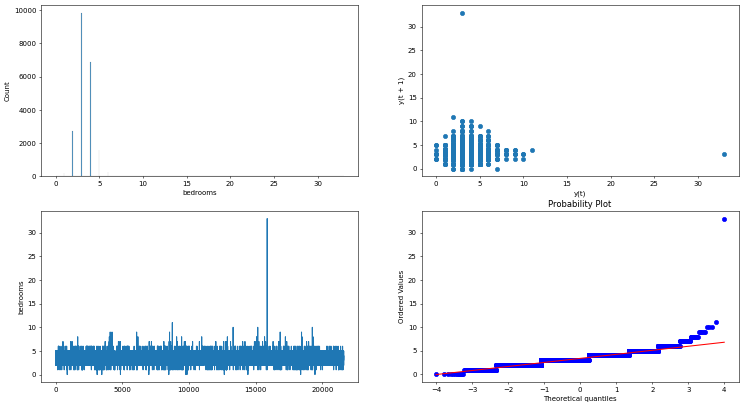

In [24]:
fig, axes = plt.subplots(2,2, figsize=(18, 10),dpi=50)
sns.histplot(df['bedrooms'],ax=axes[0,0])
pd.plotting.lag_plot(df['bedrooms'],lag=1,ax=axes[0,1])
sns.lineplot(data=df['bedrooms'],ax=axes[1,0])
st.probplot(df['bedrooms'],plot=plt) 

plotting the 4 famous plots for 'bedrooms' feature

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([0.  , 0.  , 0.  , ..., 7.75, 8.  , 8.  ])),
 (0.7454830572686852, 2.114757321982141, 0.9678048024136829))

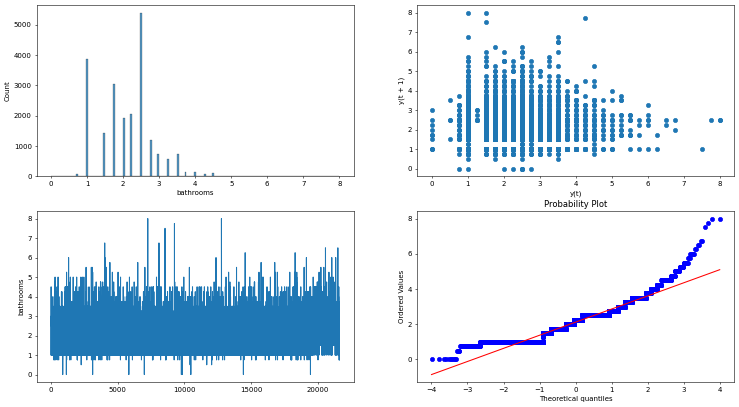

In [25]:
fig, axes = plt.subplots(2,2, figsize=(18, 10),dpi=50)
sns.histplot(df['bathrooms'],ax=axes[0,0])
pd.plotting.lag_plot(df['bathrooms'],lag=1,ax=axes[0,1])
sns.lineplot(data=df['bathrooms'],ax=axes[1,0])
st.probplot(df['bathrooms'],plot=plt) 

In [26]:
df1.drop('date',inplace=True, axis=1)

In [27]:
df1.drop('id',inplace=True, axis=1)

In [ ]:
df1

In [28]:
x = df1.values
# Standardizing the features
x_standardized = StandardScaler().fit_transform(x)
x_standardized
x_standardized

array([[-0.87373683, -0.41074512, -1.46979815, ..., -0.30604856,
        -0.9435449 , -0.26070307],
       [-0.00460911, -0.41074512,  0.16975959, ..., -0.74632345,
        -0.43259706, -0.18776351],
       [-0.98894231, -1.51907485, -1.46979815, ..., -0.13561957,
         1.07104946, -0.17225148],
       ...,
       [-0.37826804, -1.51907485,  0.16975959, ..., -0.60429929,
        -1.41069722, -0.39429725],
       [-0.38404481, -0.41074512,  0.49767113, ...,  1.02897854,
        -0.84135534, -0.42070071],
       [-0.59025986, -1.51907485,  0.16975959, ..., -0.60429929,
        -1.41069722, -0.4181337 ]])

In [29]:
cov_data = np.corrcoef(x_standardized.T)
cov_data

array([[ 1.        ,  0.31619992,  0.52165412,  0.70046625,  0.08877201,
         0.25697398,  0.26898599,  0.39701455,  0.03601907,  0.66931552,
         0.60391747,  0.31933404,  0.05620981,  0.12342465, -0.0540127 ,
         0.30928118,  0.02217976,  0.58773846,  0.08180305],
       [ 0.31619992,  1.        ,  0.51906373,  0.59398877,  0.03223755,
         0.18287118, -0.00676197,  0.08144068,  0.02411192,  0.36641337,
         0.49213564,  0.30815615,  0.16192707,  0.01677843, -0.15870827,
        -0.01152735,  0.1358971 ,  0.40475281,  0.03035596],
       [ 0.52165412,  0.51906373,  1.        ,  0.74930332,  0.0867359 ,
         0.49961414,  0.07004244,  0.18838006, -0.1269009 ,  0.65585645,
         0.68027372,  0.27754954,  0.50536056,  0.04971505, -0.20461253,
         0.02294387,  0.2261957 ,  0.56688099,  0.08739178],
       [ 0.70046625,  0.59398877,  0.74930332,  1.        ,  0.16986858,
         0.35374108,  0.10457594,  0.28199233, -0.05922286,  0.76373944,
         0.875

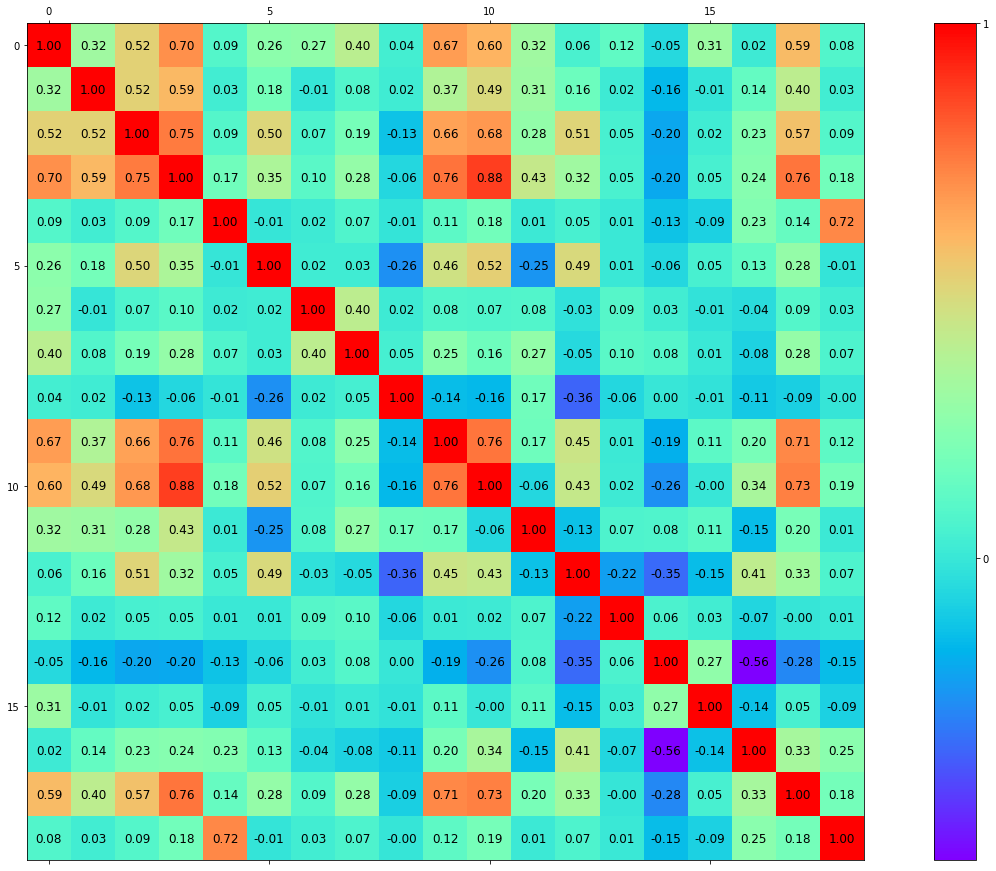

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
img = plt.matshow(cov_data,fignum=1, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=12, color='black', ha="center", va="center")
        
plt.show()

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21611 non-null  float64
 1   bedrooms       21611 non-null  float64
 2   bathrooms      21611 non-null  float64
 3   sqft_living    21611 non-null  int64  
 4   sqft_lot       21611 non-null  int64  
 5   floors         21611 non-null  float64
 6   waterfront     21611 non-null  int64  
 7   view           21611 non-null  int64  
 8   condition      21611 non-null  int64  
 9   grade          21611 non-null  int64  
 10  sqft_above     21611 non-null  int64  
 11  sqft_basement  21611 non-null  int64  
 12  yr_built       21611 non-null  int64  
 13  yr_renovated   21611 non-null  int64  
 14  zipcode        21611 non-null  int64  
 15  lat            21611 non-null  float64
 16  long           21611 non-null  float64
 17  sqft_living15  21611 non-null  int64  
 18  sqft_l

**Feature Selection**

After analyzing the data info and covariance matrix we see that the most important features whose have a correlation with the price are :
'sqft_living', 'grade','sqft_above' and 'sqft_living15'
we keep from these feature only 'sqft_living' because the others are correlated with this same feature
In this case for the multilinear regression we choose a feature with a good correlation feature with the target who are not correlated with another feature : 'View' feature satisfy this condition cov=0.4


**Linear Regression Model**

In [32]:
#extract x and y from our data
x=df1["sqft_living"].values[:,np.newaxis]
y=df1["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 64546565801.40293
R squared 0.5055730923681654


In [33]:
print(model.coef_)
print(model.intercept_)

[280.03288227]
-40704.89676237537


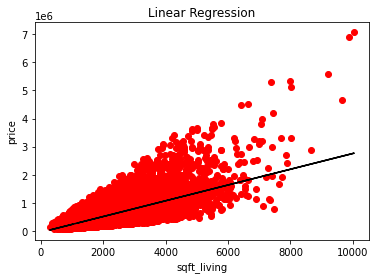

In [34]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In this part and for simple linear regression we cleaned the data to eliminate 'under regression curve values' above to make the curve more close to the points : R squared is 0.5 a quite average value

**Multi-Linear Regression Model**

In [35]:
#extract x and y from our data
x2=df1[["sqft_living","view"]]  #we have more than one input
y2=df1["price"].values
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.35,random_state=40) #splitting data with test size of 35%
model1=LinearRegression() #build linear regression model
model1.fit(x_train,y_train) #fitting the training data
predicted=model1.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 58833772023.26303
R squared 0.549333111613104


In [36]:
print(model1.coef_)
print(model1.intercept_)

[   254.65290961 102958.34475052]
-12390.540983488434


after putting the 'view' feature in the equation wich is correlated with the price, we observe that R squared have been improved = 0.54

In [37]:
#extract x and y from our data
x3=df1[["sqft_living","lat"]]  #we have more than one input
y3=df1["price"].values
x_train,x_test,y_train,y_test=train_test_split(x3,y3,test_size=0.35,random_state=40) #splitting data with test size of 35%
model1=LinearRegression() #build linear regression model
model1.fit(x_train,y_train) #fitting the training data
predicted=model1.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 54979155027.01621
R squared 0.57885949055979


here i choosed the 'lat' feature which is not correlated with other features, and we obtain a much more important R squared coefficient:   0.5788.
the result is explained by the fact that this feature is not correlated with another one all the covariance is reserved with the target.

**Conclusion**

The model with multinear regression is more 'accurate' than linear regression since it take two features to explain the covariance and the relation with the target.

In [ ]:
sns.pairplot(df1)